In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

In [5]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [6]:
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [10]:
svc = SVC(C=10, kernel='poly', degree=3)
svc.fit(X_train, Y_train)

SVC(C=10, kernel='poly')

In [11]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9818181818181818


In [12]:
# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Sample Index': range(len(Y_test)),
                           'Actual': Y_test,
                           'Predicted': y_pred})

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results_df)

      Sample Index       Actual    Predicted
1451             0    muskmelon    muskmelon
1334             1   watermelon   watermelon
1761             2       papaya       papaya
1735             3       papaya       papaya
1576             4        apple        apple
1110             5        mango        mango
1594             6        apple        apple
530              7    mothbeans    mothbeans
651              8     mungbean     mungbean
819              9       lentil       lentil
771             10    blackgram    blackgram
1878            11      coconut      coconut
915             12  pomegranate  pomegranate
2015            13         jute         jute
1876            14      coconut      coconut
937             15  pomegranate  pomegranate
1562            16        apple        apple
179             17        maize        maize
1723            18       papaya       papaya
1472            19    muskmelon    muskmelon
2167            20       coffee       coffee
1716      

In [14]:
# Take input from the user
feature1 = float(input("Enter the value for N : "))
feature2 = float(input("Enter the value for P : "))
feature3 = float(input("Enter the value for K : "))
feature4 = float(input("Enter the value for temperature : "))
feature5 = float(input("Enter the value for humidity : "))
feature6 = float(input("Enter the value for ph : "))
feature7 = float(input("Enter the value for rainfall : "))

# Create input data for prediction
input_data = np.array([[feature1, feature2, feature3,feature4, feature5, feature6, feature7]])

# Make predictions
predicted_label = svc.predict(input_data)

print("Predicted Label:", predicted_label)


Enter the value for N : 80
Enter the value for P : 85
Enter the value for K : 45
Enter the value for temperature : 28
Enter the value for humidity : 80
Enter the value for ph : 6.7
Enter the value for rainfall : 220
Predicted Label: ['rice']


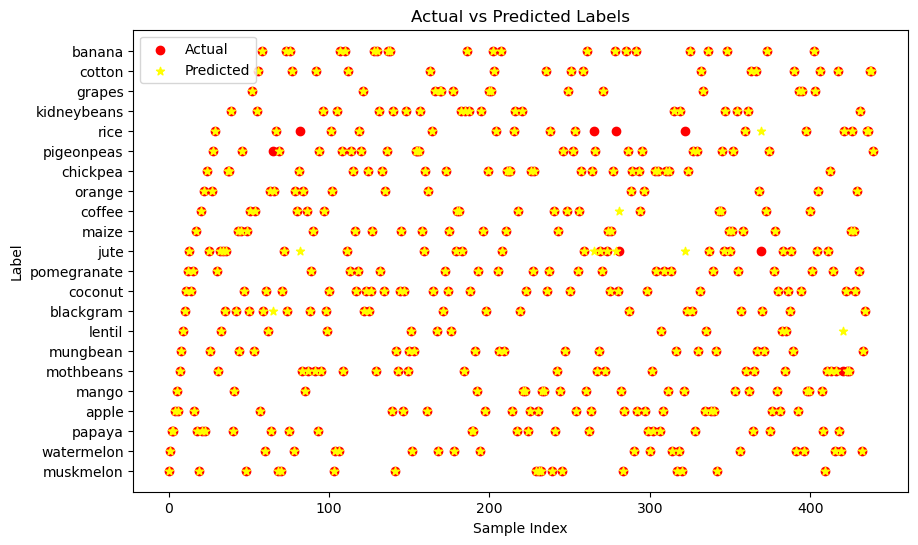

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='red', label='Actual')
plt.scatter(range(len(Y_test)), y_pred, color='yellow',marker='*', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()
